In [22]:
import statistics as stats
import matplotlib.pyplot as plt 
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]
x_mean = stats.mean(x)
y_mean = stats.mean(y)
print(x_mean, y_mean)

6.5 117.75


In [23]:
x_variance = [x[i] - x_mean for i in range(len(x))]
print(x_variance)

[-5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]


In [24]:
y_variance = [y[i] - y_mean for i in range(len(y))]# calculate the variance 
print(y_variance)
print(sum(y_variance))

[-65.75, -43.75, -38.75, -22.75, -2.75, -7.75, 11.25, 8.25, 29.25, 28.25, 38.25, 66.25]
0.0


In [25]:
x_variance_squared =  [(x[i] - x_mean) ** 2 for i in range(len(x))]
print(x_variance_squared)

[30.25, 20.25, 12.25, 6.25, 2.25, 0.25, 0.25, 2.25, 6.25, 12.25, 20.25, 30.25]


In [26]:
xy_variance = 0
for i in range(len(x_variance)):
        xy_variance += (x_variance[i] * y_variance[i])
print(xy_variance)

1485.5


In [27]:
    slope = xy_variance / sum(x_variance_squared)#calculate m the slope 
    print(slope)

10.388111888111888


In [28]:
def intercept(slope_data): #intercept b calculation
    intercept = y_mean - (slope_data * x_mean)
    return intercept
y_intercept = intercept(slope)
print(y_intercept)

50.22727272727272


In [29]:
def get_estimation_y(x_data):#i have calculate the distance between line and Y axis(estimated value)
    y_estimation = []
    for i in x_data:
        y_calculus = slope * i + y_intercept
        y_estimation.append(y_calculus)
    return y_estimation
estimated_value = get_estimation_y(x)
print(estimated_value)

[60.615384615384606, 71.00349650349649, 81.39160839160839, 91.77972027972027, 102.16783216783216, 112.55594405594405, 122.94405594405593, 133.33216783216784, 143.72027972027973, 154.1083916083916, 164.4965034965035, 174.8846153846154]


In [30]:
#predicted_value = [slope * i + y_intercept for i in x]


In [31]:
def calculate_loss(y_actual, y_estimate):
    loss = 0
    for i in range(len(y_estimate)):
        loss_calculation = (y_actual[i] - y_estimate[i])**2
        loss += loss_calculation
        sqrt = loss**0.5
    return sqrt
#print(calculate_loss(y, predicted_value))
        

In [32]:
#calculate b and m gradient to get the lowest loss for both values m and b 
#find the best m and best b 
b = 0 
m = 0

In [33]:
#calculate the intercept "b" using the gradient descent formula
def get_intercept(m, b, y_observed, x_data):
    gradient_intercept = 0
    N = len(x_data)
    for i in range(len(y_observed)):
        calculus_intercept = -(2/N) * (y_observed[i] - (b + m * x_data[i]))
        gradient_intercept += calculus_intercept
    return gradient_intercept
print(get_intercept(m, b, y, x))

-235.5


In [34]:
#calculate the slope "m" using the gradient descent formula
def get_slope(m, b, y_observed, x_data):
    gradient_slope = 0
    N = len(x_data)
    for i in range(len(y_observed)):
        calculus_slope = x_data[i] *(y_observed[i] - (b + m * x_data[i]))
        gradient_slope += - (2/N) * calculus_slope
    return gradient_slope
print(get_slope(m, b, y, x))

-1778.3333333333333


In [35]:
#calculate the step size by multiplying the learning rate with gradient slope and gradient intercept
def step_gradient(m_current, b_current, y_observed, x_data, learning_rate):
    gradient_b = get_intercept(m_current, b_current, y_observed, x_data)
    gradient_m = get_slope(m_current, b_current, y_observed, x_data)
    new_slope = m_current - (learning_rate * gradient_m)
    new_intercept = b_current - (learning_rate * gradient_b)
    return [new_intercept, new_slope]
b, m = step_gradient(m, b, y, x, 0.01)
print(b, m)

2.355 17.78333333333333


In [36]:
def gradient_descent(y, x, learning_rate, iterations):
    m = 0
    b = 0 
    for i in range(iterations):
        step_gradient(m, b, y, x, learning_rate)
        gradient_b = get_intercept(m, b, y, x)
        gradient_m = get_slope(m, b, y, x)
        m = m - (learning_rate * gradient_m)
        b = b - (learning_rate * gradient_b)
    return m, b
m, b = gradient_descent(y, x, 0.0001, 1000)
print(m, b)

15.957250934367627 4.001422178921807


In [37]:
predicted_value = [m * i + b for i in x]
print(predicted_value)

[19.958673113289436, 35.91592404765706, 51.873174982024686, 67.83042591639231, 83.78767685075994, 99.74492778512757, 115.70217871949521, 131.65942965386282, 147.61668058823045, 163.5739315225981, 179.53118245696572, 195.48843339133333]


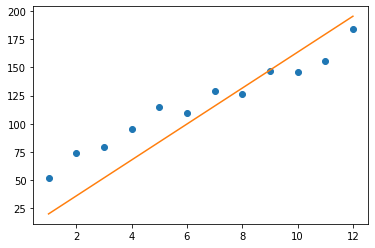

In [38]:
plt.plot(x, y, "o")
plt.plot(x, predicted_value)
plt.show()